## Big Data Analytics / Asssignment 01 
### Submitted By:  
#### Khizar Sultan 16F8153 
#### Abaidullah 16F8132 
#### Abdul Manan 16F8294

### Submitted To:  
#### Sir Hafiz Tayyeb Javaid 

#### it's really honor for us that we are learning Big Data Analytics from our respected *Sir Hafiz Tayyab*. He is doing Ph.D in Big Data Analytics and teaching us at FAST-NUCES.
#### In this notebook, we will try our best to let you know the hands on experience to Analyze Big Data. At the end of this tutorial, if you will have any query or question, you can ask me at khizersultan007@gmail.com without any hesitation. Thank you!

### What is Hadoop Ecosystem ?

Hadoop ecosystem is a platform which helps in solving the big data problems using distributed storage and distributed computing on computer clusters, following diagram will give a brief understanding of Hadoop
<img src="https://www.edureka.co/blog/wp-content/uploads/2016/10/HADOOP-ECOSYSTEM-Edureka.png" />

## I will use Spark and why?
#### According to google :
<b> Spark has been found to run *100 times faster in-memory, and 10 times faster on disk*. <br>
    It's also been used to sort 100 TB of data 3 times faster than Hadoop MapReduce on one-tenth of the machines. <br>
    Spark has particularly been found to be faster on machine learning applications, such as Naive Bayes and k-means </b>
    
## What is Spark? 

#### Spark Core
Spark Core is the base engine for large-scale parallel and distributed data processing. The core is the distributed execution engine and the Java, Scala, and Python APIs offer a platform for distributed ETL application development. Further, additional libraries which are built atop the core allow diverse workloads for streaming, SQL, and machine learning. It is responsible for:
Memory management and fault recovery
Scheduling, distributing and monitoring jobs on a cluster
Interacting with storage systems

#### Spark Streaming
Spark Streaming is the component of Spark which is used to process real-time streaming data. Thus, it is a useful addition to the core Spark API. It enables high-throughput and fault-tolerant stream processing of live data streams. The fundamental stream unit is DStream which is basically a series of RDDs (Resilient Distributed Datasets) to process the real-time data

#### Spark SQL
Spark SQL is a new module in Spark which integrates relational processing with Spark’s functional programming API. It supports querying data either via SQL or via the Hive Query Language. For those of you familiar with RDBMS, Spark SQL will be an easy transition from your earlier tools where you can extend the boundaries of traditional relational data processing.

#### GraphX
GraphX is the Spark API for graphs and graph-parallel computation. Thus, it extends the Spark RDD with a Resilient Distributed Property Graph.

#### MLlib (Machine Learning)
MLlib stands for Machine Learning Library. Spark MLlib is used to perform machine learning in Apache Spark    

# Let's Start Now:) 

###### we will use Pokec data set
Pokec is the most popular on-line social network in Slovakia. The popularity of network has not changed even after the coming of Facebook. Pokec has been provided for more than 10 years and connects more than 1.6 million people. Datasets contains anonymized data of the whole network. Profile data contains gender, age, hobbies, interest, education etc. Profile data are in Slovak language. Friendships in Pokec are oriented

###### you can get this dataset from the following site:
https://snap.stanford.edu/data/soc-Pokec.html.

### Note:
##### you need to configure hadoop and spark using following link , but  I have already installed and configure spark :)
https://medium.com/@naomi.fridman/install-pyspark-to-run-on-jupyter-notebook-on-windows-4ec2009de21f

In [4]:
import os
print(os.environ['SPARK_HOME'])
print(os.environ['JAVA_HOME'])
print(os.environ['PATH'])

C:\spark-2.4
C:\Program Files\Java\jdk-13.0.1
C:\Users\Khizar Sultan\Anaconda3;C:\Users\Khizar Sultan\Anaconda3\Library\mingw-w64\bin;C:\Users\Khizar Sultan\Anaconda3\Library\usr\bin;C:\Users\Khizar Sultan\Anaconda3\Library\bin;C:\Users\Khizar Sultan\Anaconda3\Scripts;C:\Program Files (x86)\Common Files\Oracle\Java\javapath;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Windows\System32\OpenSSH\;C:\Program Files\Git\cmd;C:\Program Files\Java\jdk-13.0.1\bin;C:\spark-2.4\bin;C:\spark-2.4\bin;C:\Users\Khizar Sultan\AppData\Local\Microsoft\WindowsApps;"C:\Users\Khizar Sultan\AppData\Local\Programs\Microsoft VS Code\bin;C:\spark-2.4\bin";;C:\Users\Khizar Sultan\AppData\Local\Programs\Microsoft VS Code\bin;C:\Users\Khizar Sultan\Anaconda3\lib\site-packages\numpy\.libs


In [4]:
# import pyspark
import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()

'C:\\spark-2.4'

In [5]:
from pyspark import SparkConf,SparkContext
from pyspark.sql import SparkSession, SQLContext

In [6]:
conf = SparkConf().setAppName('Pokec').setMaster('local')
sc = SparkContext(conf=conf)
spark = SparkSession(sc)

In [8]:
print(f"Spark Version is {sc.version}")
# sc.stop()

Spark Version is 3.0.0-preview2


In [121]:
%%time
df_profile = spark.read.format("csv").option("header","true").option("delimiter","\t").load('dataset/soc-pokec-profiles.txt')
df_relationships = spark.read.format("csv").option("header","true").option("delimiter","\t").load('dataset/soc-pokec-relationships.txt')
print("Both Files has been readed")

Both Files has been readed
Wall time: 22.5 s


In [124]:
old_columns = df_profile.columns
len(old_columns)

60

In [125]:
new_columns = ['user_id','public','completion_percentage','gender','region','last_login','registration','AGE',\
               'body','I_am_working_in_field','spoken_languages','hobbies','I_most_enjoy_good_food','pets','body_type',\
               'my_eyesight','eye_color','hair_color','hair_type','completed_level_of_education','favourite_color',\
               ' relation_to_smoking','relation_to_alcohol','sign_in_zodiac','on_pokec_i_am_looking_for','love_is_for_me',\
               'relation_to_casual_sex','my_partner_should_be','marital_status','children','relation_to_children',\
               'I_like_movies','I_like_watching_movie','I_like_music','I_mostly_like_listening_to_music',\
               'the_idea_of_good_evening','I_like_specialties_from_kitchen','fun',' I_am_going_to_concerts',\
               'my_active_sports','my_passive_sports',' profession','I_like_books','life_style','music','cars','politics',\
               'relationships','art_culture','hobbies_interests','science_technologies','computers_internet',' education',\
               'sport','movies','travelling','health','companies_brands','is_vergin','is_white']
len(new_columns)

60

In [126]:
relationship_old_columns = df_relationships.columns
len(relationship_old_columns)

2

In [127]:
relationship_new_columns = ['Foriegn_key','Friend_key']
len(relationship_new_columns)

2

### Changing Column Names for the sake of understanding of Data :)

In [128]:
# for profile dataset
for c,n in zip(old_columns,new_columns):
    df_profile=df_profile.withColumnRenamed(c,n)    
        
# for relationship dataset    
for c,n in zip(relationship_old_columns,relationship_new_columns):
    df_relationships=df_relationships.withColumnRenamed(c,n)

In [15]:
# number of rows
print(f"No.s of Rows in Profile Text File is {df_profile.count()}")
print(f"No.s of Rows in Relationship Text File is {df_relationships.count()}")

No.s of Rows in Profile Text File is 1632802
No.s of Rows in Relationship Text File is 30622563


In [129]:
print(f"Following is the Schema of Profile Text File :")
df_profile.printSchema()

Following is the Schema of Profile Text File :
root
 |-- user_id: string (nullable = true)
 |-- public: string (nullable = true)
 |-- completion_percentage: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- region: string (nullable = true)
 |-- last_login: string (nullable = true)
 |-- registration: string (nullable = true)
 |-- AGE: string (nullable = true)
 |-- body: string (nullable = true)
 |-- I_am_working_in_field: string (nullable = true)
 |-- spoken_languages: string (nullable = true)
 |-- hobbies: string (nullable = true)
 |-- I_most_enjoy_good_food: string (nullable = true)
 |-- pets: string (nullable = true)
 |-- body_type: string (nullable = true)
 |-- my_eyesight: string (nullable = true)
 |-- eye_color: string (nullable = true)
 |-- hair_color: string (nullable = true)
 |-- hair_type: string (nullable = true)
 |-- completed_level_of_education: string (nullable = true)
 |-- favourite_color: string (nullable = true)
 |--  relation_to_smoking: string (nulla

In [32]:
print(f"Following is the Schema of Relationship Text File :")
df_relationships.printSchema()

Following is the Schema of Relationship Text File :
root
 |-- Foriegn_key: string (nullable = true)
 |-- Friend_key: string (nullable = true)



In [33]:
print("Following is the summary of Relationship file")
df_relationships.describe().show()

Following is the summary of Relationship file
+-------+------------------+------------------+
|summary|       Foriegn_key|        Friend_key|
+-------+------------------+------------------+
|  count|          30622563|          30622563|
|   mean|464459.61943547963|458584.85949350486|
| stddev|353495.57459789095| 352764.5905865541|
|    min|                 1|                 1|
|    max|            999999|            999999|
+-------+------------------+------------------+



In [34]:
print("Following is the summary of Profile Data")
df_profile.describe().show()

Following is the summary of Profile Data
+-------+-----------------+------------------+---------------------+------------------+--------------------+--------------------+--------------------+------------------+-------------------------------------+-------------------------------------+-------------------------------------+-------------------------------------+-------------------------------------+--------------------+-------------------------------------+-------------------------------------+-------------------------------------+-------------------------------------+-------------------------------------+-------------------------------------+-------------------------------------+-------------------------------------+-------------------------------------+-------------------------------------+-------------------------+--------------------+----------------------+--------------------+--------------------+--------+--------------------+--------------------+---------------------+--------------

### We have explore the no. of rows and dimensions of data and now we will Clean and Process our Data using Pandas

In [17]:
print(df_profile.columns)

['user_id', 'public', 'completion_percentage', 'gender', 'region', 'last_login', 'registration', 'AGE', 'body', 'I_am_working_in_field', 'spoken_languages', 'hobbies', 'I_most_enjoy_good_food', 'pets', 'body_type', 'my_eyesight', 'eye_color', 'hair_color', 'hair_type', 'completed_level_of_education', 'favourite_color', ' relation_to_smoking', 'relation_to_alcohol', 'sign_in_zodiac', 'on_pokec_i_am_looking_for', 'love_is_for_me', 'relation_to_casual_sex', 'my_partner_should_be', 'marital_status', 'children', 'relation_to_children', 'I_like_movies', 'I_like_watching_movie', 'I_like_music', 'I_mostly_like_listening_to_music', 'the_idea_of_good_evening', 'I_like_specialties_from_kitchen', 'fun', ' I_am_going_to_concerts', 'my_active_sports', 'my_passive_sports', ' profession', 'I_like_books', 'life_style', 'music', 'cars', 'politics', 'relationships', 'art_culture', 'hobbies_interests', 'science_technologies', 'computers_internet', ' education', 'sport', 'movies', 'travelling', 'health', '

In [130]:
def count_nulls(column, df = df_profile):
    return df_profile.filter(df[column] == 'null').count()

In [131]:
# Total Null Values in Gender column
count_nulls('gender')

163

### Removing Null Values 

In [ ]:
from pyspark.sql.functions import col

In [181]:
keys_of_null = df_profile.select('user_id').filter((df_profile.gender == 'null') | (df_profile.region == 'null')\
                                   |(df_profile.registration == 'null')|(df_profile.AGE == 'null')\
                                   |(df_profile.spoken_languages == 'null')|(df_profile.hobbies == 'null')\
                                   |(df_profile.hair_type == 'null')|(df_profile.love_is_for_me == 'null')\
                                   |(df_profile.I_like_movies == 'null')|(df_profile.fun == 'null')\
                                   |(df_profile.politics == 'null')|(df_profile.cars == 'null')\
                                   |(df_profile.relationships == 'null')|(df_profile.computers_internet == 'null')\
                                   |(df_profile.sport == 'null')|(df_profile.companies_brands == 'null'))

In [184]:
keys_of_null

DataFrame[user_id: string]

In [7]:
pd_df_profile = pd.read_csv('dataset/soc-pokec-profiles.txt', delimiter='\t')
pd_df_profile.columns = ['user_id','public','completion_percentage','gender','region','last_login','registration','AGE',\
               'body','I_am_working_in_field','spoken_languages','hobbies','I_most_enjoy_good_food','pets','body_type',\
               'my_eyesight','eye_color','hair_color','hair_type','completed_level_of_education','favourite_color',\
               ' relation_to_smoking','relation_to_alcohol','sign_in_zodiac','on_pokec_i_am_looking_for','love_is_for_me',\
               'relation_to_casual_sex','my_partner_should_be','marital_status','children','relation_to_children',\
               'I_like_movies','I_like_watching_movie','I_like_music','I_mostly_like_listening_to_music',\
               'the_idea_of_good_evening','I_like_specialties_from_kitchen','fun',' I_am_going_to_concerts',\
               'my_active_sports','my_passive_sports',' profession','I_like_books','life_style','music','cars','politics',\
               'relationships','art_culture','hobbies_interests','science_technologies','computers_internet',' education',\
               'sport','movies','travelling','health','companies_brands','is_vergin','is_white']

In [8]:
pd_df_relationship = pd.read_csv('dataset/soc-pokec-relationships.txt', delimiter='\t')
pd_df_relationship.columns = ['Foriegn_key','Friend_key']

#### No. of null values in each column of profile data

In [49]:
pd_df_profile.isnull().sum()

user_id                                   0
public                                    0
completion_percentage                     0
gender                                  163
region                                  163
last_login                              163
registration                            163
AGE                                     163
body                                 838959
I_am_working_in_field               1051691
spoken_languages                     831112
hobbies                              828490
I_most_enjoy_good_food               936563
pets                                 932122
body_type                            886859
my_eyesight                          814890
eye_color                            732963
hair_color                           779960
hair_type                            861848
completed_level_of_education         886857
favourite_color                      804926
 relation_to_smoking                 786858
relation_to_alcohol             

### No. of null values in each column of relationship data

In [63]:
pd_df_relationship.isnull().sum()

Foriegn_key    0
Friend_key     0
dtype: int64

In [9]:
#change the type of columns
for c in pd_df_profile.columns:
    pd_df_profile[c] = pd_df_profile[c].astype('category')

In [20]:
pd_df_profile.head(10)

,user_id,public,completion_percentage,gender,region,last_login,registration,AGE,body,I_am_working_in_field,...,science_technologies,computers_internet,education,sport,movies,travelling,health,companies_brands,is_vergin,is_white
0,2,1,62,0.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:08:00.0,2007-11-30 00:00:00.0,0.0,"166 cm, 58 kg",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16,1,64,1.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:19:40.0,2008-05-18 00:00:00.0,23.0,"173 cm, 70 kg",najvatcsej firme na svete urad prace,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0,38,1.0,"bratislavsky kraj, bratislava - karlova ves",2012-05-10 18:05:00.0,2010-05-23 00:00:00.0,29.0,NaN,"reklamy a medii, sluzieb a obchodu",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,12,0.0,"banskobystricky kraj, brezno",2011-12-29 12:25:00.0,2011-12-29 00:00:00.0,26.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17,1,47,0.0,"zilinsky kraj, martin",2012-05-25 09:40:00.0,2006-10-21 00:00:00.0,27.0,"162 cm, 60 kg",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1,66,1.0,"zilinsky kraj, zilina",2012-05-25 01:10:00.0,2006-05-29 00:00:00.0,26.0,NaN,som nezamestnany,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,18,1,31,1.0,"zilinsky kraj, kysucke nove mesto",2012-05-02 21:19:00.0,2007-12-13 00:00:00.0,18.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,31,1,62,1.0,"zilinsky kraj, kysucke nove mesto",2012-02-18 13:20:00.0,2007-01-01 00:00:00.0,24.0,"170 cm, 75 kg",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,19,1,64,1.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 19:34:00.0,2007-03-23 00:00:00.0,21.0,"0.19 cm, 88 kg",sexualnej,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6,0,22,0.0,"zilinsky kraj, zilina",2012-05-25 20:40:00.0,2007-12-15 00:00:00.0,38.0,"160 cm, 57 kg",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# age_null = pd_df_profile.loc[pd_df_profile.body == pd.isna(pd_df_profile)]
null_users = pd_df_profile.loc[(pd.isna(pd_df_profile.body)) | pd.isna(pd_df_profile.gender)\
                               |(pd.isna(pd_df_profile.I_am_working_in_field))\
                               |(pd.isna(pd_df_profile.body))\
                               |(pd.isna(pd_df_profile.science_technologies)) 
                               |(pd.isna(pd_df_profile.region))\
                               |(pd.isna(pd_df_profile.travelling))\
                               |(pd.isna(pd_df_profile.health))\
                               |(pd.isna(pd_df_profile.sport))\
                               |(pd.isna(pd_df_profile.movies))\
                               |(pd.isna(pd_df_profile.companies_brands))\
                               |(pd.isna(pd_df_profile.is_white))]['user_id']

In [24]:
friends_df = pd_df_profile.loc[pd_df_profile.user_id.isin(friend_keys.Friend_key)]

In [117]:
def fill_values_by_friends(key,df_real = pd_df_profile, df_relationsihp = friend_keys, df_friends = friends_df):
    friends_id = friend_keys.Friend_key[friend_keys.Foriegn_key == key]
    #now extract a specific record
    # of a friend
    friend_data = friends_df[friends_df.user_id == friends_id.iloc[0]]
    #now impute the values
    pd_df_profile[pd_df_profile.user_id == key] = pd_df_profile[pd_df_profile.user_id == key].fillna(friend_data)

In [187]:
map(fill_values_by_friends,set(friend_keys.Foriegn_key))

In [190]:
small_df = pd_df_profile.iloc[0:5000,0:15]

In [195]:
small_df.fillna(method='ffill', inplace = True)

In [196]:
# There is no  null value at all 
small_df.isnull().sum()

user_id                   0
public                    0
completion_percentage     0
gender                    0
region                    0
last_login                0
registration              0
AGE                       0
body                      0
I_am_working_in_field     0
spoken_languages          0
hobbies                   0
I_most_enjoy_good_food    0
pets                      0
body_type                 0
dtype: int64

In [202]:
# small_df.drop('user_id',axis=1, inplace=True)

In [205]:
small_df.head(10)

,public,completion_percentage,gender,region,last_login,registration,AGE,body,I_am_working_in_field,spoken_languages,hobbies,I_most_enjoy_good_food,pets,body_type
0,1,62,0.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:08:00.0,2007-11-30 00:00:00.0,0.0,"166 cm, 58 kg",najvatcsej firme na svete urad prace,nemecky,"turistika, prace okolo domu, praca s pc, pocuv...",pri svieckach s partnerom,macka,priemerna
1,1,64,1.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:19:40.0,2008-05-18 00:00:00.0,23.0,"173 cm, 70 kg",najvatcsej firme na svete urad prace,no predsa svoj :d a najlepsie druhy,"cestovanie, pocuvanie hudby, nenudit sa",v dobrej restauracii,ja a nas prefikany alik :),nemozem pribrat nedasa smola som moc aktivny
2,0,38,1.0,"bratislavsky kraj, bratislava - karlova ves",2012-05-10 18:05:00.0,2010-05-23 00:00:00.0,29.0,"170 cm, 50 kg","reklamy a medii, sluzieb a obchodu","anglicky, nemecky","sportovanie, cestovanie","pri svieckach s partnerom, v prirode, v dobrej...",uz nemam ziadne,priemerna
3,1,12,0.0,"banskobystricky kraj, brezno",2011-12-29 12:25:00.0,2011-12-29 00:00:00.0,26.0,"170 cm, 50 kg","reklamy a medii, sluzieb a obchodu","anglicky, nemecky","sportovanie, cestovanie","pri svieckach s partnerom, v prirode, v dobrej...",uz nemam ziadne,priemerna
4,1,47,0.0,"zilinsky kraj, martin",2012-05-25 09:40:00.0,2006-10-21 00:00:00.0,27.0,"162 cm, 60 kg","reklamy a medii, sluzieb a obchodu","anglicky, nemecky","citanie, pocuvanie hudby, pozeranie filmov, sp...","pri svieckach s partnerom, v prirode, v dobrej...",pes,priemerna
5,1,66,1.0,"zilinsky kraj, zilina",2012-05-25 01:10:00.0,2006-05-29 00:00:00.0,26.0,"162 cm, 60 kg",som nezamestnany,"anglicky, nemecky, pascal","sportovanie, prace v zahrade, pc hry, pocuvani...",v dobrej restauracii,"nemam ziadne, nemam rad zvierata zo vseobecnos...",vysportovana
6,1,31,1.0,"zilinsky kraj, kysucke nove mesto",2012-05-02 21:19:00.0,2007-12-13 00:00:00.0,18.0,"162 cm, 60 kg",som nezamestnany,anglicky,"sportovanie, prace v zahrade, pc hry, pocuvani...",v dobrej restauracii,"nemam ziadne, nemam rad zvierata zo vseobecnos...",vysportovana
7,1,62,1.0,"zilinsky kraj, kysucke nove mesto",2012-02-18 13:20:00.0,2007-01-01 00:00:00.0,24.0,"170 cm, 75 kg",som nezamestnany,"nemecky, slovensky,cesky,ale najlepsie svoj","sportovanie, turistika, prace okolo domu, prac...",v dobrej restauracii,"pes, tinku",diky vyhovuje mi
8,1,64,1.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 19:34:00.0,2007-03-23 00:00:00.0,21.0,"0.19 cm, 88 kg",sexualnej,no proste ten vlasny,"sportovanie, cestovanie, turistika, pozeranie ...","v posteli, s niekym koho mam velmi rad",mam toho ako doroka dni,diky vyhovuje mi
9,0,22,0.0,"zilinsky kraj, zilina",2012-05-25 20:40:00.0,2007-12-15 00:00:00.0,38.0,"160 cm, 57 kg",sexualnej,no proste ten vlasny,"sportovanie, cestovanie, turistika, pozeranie ...","v posteli, s niekym koho mam velmi rad",mam psika:),diky vyhovuje mi


In [207]:
small_df['public'] = small_df.public.astype('float64')
small_df.completion_percentage = small_df.completion_percentage.astype('float64')
small_df.gender = small_df.gender.astype('float64')
small_df.AGE = small_df.AGE.astype("float64")

In [209]:
num_data = small_df.select_dtypes(include='float64')
cat_data = small_df.select_dtypes(include='category')

In [210]:
num_data

,public,completion_percentage,gender,AGE
0,1.0,62.0,0.0,0.0
1,1.0,64.0,1.0,23.0
2,0.0,38.0,1.0,29.0
3,1.0,12.0,0.0,26.0
4,1.0,47.0,0.0,27.0
...,...,...,...,...
4995,0.0,43.0,1.0,22.0
4996,0.0,12.0,1.0,0.0
4997,1.0,55.0,0.0,22.0
4998,1.0,47.0,1.0,24.0


In [213]:
# normalization of num data
from sklearn.preprocessing import StandardScaler

In [214]:
sc = StandardScaler()
num_data_prepared = pd.DataFrame(sc.fit_transform(num_data),columns=num_data.columns)

In [215]:
num_data_prepared

,public,completion_percentage,gender,AGE
0,0.901979,0.581657,-0.901250,-1.527438
1,0.901979,0.668227,1.109571,0.688055
2,-1.108674,-0.457186,1.109571,1.266010
3,0.901979,-1.582599,-0.901250,0.977033
4,0.901979,-0.067620,-0.901250,1.073359
...,...,...,...,...
4995,-1.108674,-0.240760,1.109571,0.591729
4996,-1.108674,-1.582599,1.109571,-1.527438
4997,0.901979,0.278661,-0.901250,0.591729
4998,0.901979,-0.067620,1.109571,0.784381


In [218]:
# for encoding the text to integer
from sklearn.feature_extraction.text import CountVectorizer 

In [219]:
# Example
cv = CountVectorizer() 

In [257]:
prepared_cat = {}
for col in cat_data.columns:
    prepared_cat[col]  = cv.fit_transform(cat_data[col]).toarray() # bag of words

In [259]:
prepared_cat['region']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [264]:
cat_data.columns

Index(['region', 'last_login', 'registration', 'body', 'I_am_working_in_field',
       'spoken_languages', 'hobbies', 'I_most_enjoy_good_food', 'pets',
       'body_type'],
      dtype='object')

In [262]:
cat_prepared_df = pd.DataFrame(prepared_cat['region'])

In [268]:
cat_prepared_df = pd.concat([pd.DataFrame(prepared_cat['last_login']),\
                             pd.DataFrame(prepared_cat['registration']),\
                             pd.DataFrame(prepared_cat['body']),\
                             pd.DataFrame(prepared_cat['I_am_working_in_field']),\
                             pd.DataFrame(prepared_cat['spoken_languages']),\
                             pd.DataFrame(prepared_cat['hobbies']),\
                             pd.DataFrame(prepared_cat['I_most_enjoy_good_food']),\
                             pd.DataFrame(prepared_cat['pets']),\
                             pd.DataFrame(prepared_cat['body_type'])],axis=1)

In [271]:
full_prepared_df = pd.concat([num_data_prepared,cat_prepared_df],axis=1)

In [307]:
full_prepared_df

,public,completion_percentage,gender,AGE,0,1,2,3,4,5,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
0,0.901979,0.581657,-0.901250,-1.527438,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.901979,0.668227,1.109571,0.688055,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,-1.108674,-0.457186,1.109571,1.266010,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0.901979,-1.582599,-0.901250,0.977033,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.901979,-0.067620,-0.901250,1.073359,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.108674,-0.240760,1.109571,0.591729,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4996,-1.108674,-1.582599,1.109571,-1.527438,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0.901979,0.278661,-0.901250,0.591729,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4998,0.901979,-0.067620,1.109571,0.784381,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [316]:
from sklearn.decomposition import PCA

In [317]:
pca = PCA()

In [318]:
data_pca = pca.fit_transform(full_prepared_df)

In [323]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.056007  , 0.08984088, 0.11579041, ..., 1.        , 1.        ,
       1.        ])

In [321]:
data_pca.shape

(5000, 5000)

In [273]:
# from sklearn.model_selection import train_test_split

In [302]:
from sklearn.cluster import KMeans

In [325]:
clusters = KMeans(n_clusters= 3)

In [326]:
kmeans=clusters.fit_predict(data_pca)

In [327]:
clusters.labels_

array([1, 2, 2, ..., 0, 1, 1])

In [328]:
from collections import Counter as count
import matplotlib.pyplot as plt

In [329]:
total_kmeans = count(clusters.labels_)

In [330]:
total_kmeans

Counter({1: 1442, 2: 1519, 0: 2039})

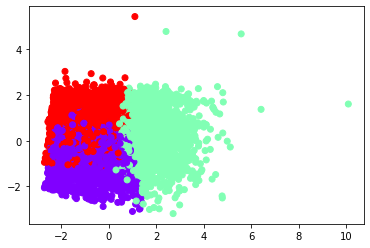

In [332]:
plt.scatter(data_pca[:,0],data_pca[:,1], c=clusters.labels_, cmap='rainbow')